# MW dynamical friction implementation

In [4]:
%pylab inline
import os.path
from subprocess import call
from IPython.display import Image
from IPython.display import HTML
import seaborn as sns
from scipy.interpolate import interp1d
font = {'size':13, 'family':'serif'}
matplotlib.rc('font', **font)

Populating the interactive namespace from numpy and matplotlib


In [11]:
sns.set(style="ticks", context="talk")

In [3]:
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')


To compute the dynamical friction that the MW 'feels' due to Sag the enclosed Mass of the MW that is in 
the Sag virial radius (Rv_sag) have to be computed. It is important to rememeber that:

- $ Rv_{Sag} \sim  \dfrac{Rv_{MW}}{2}$ 
- $M_{Sag} \sim \dfrac{M_{MW}}{10}$

In our first method the enclosed mass is computed as the mass inside a NFW sphere of radius $D$
where $D$ is the distance from the Sag Halo innner boundary to the MW halo boundary. This is sketch in Fig.1

$D = Rvir_{MW} - (x) = Rvir_{MW} - (Rvir_sag -  R)$

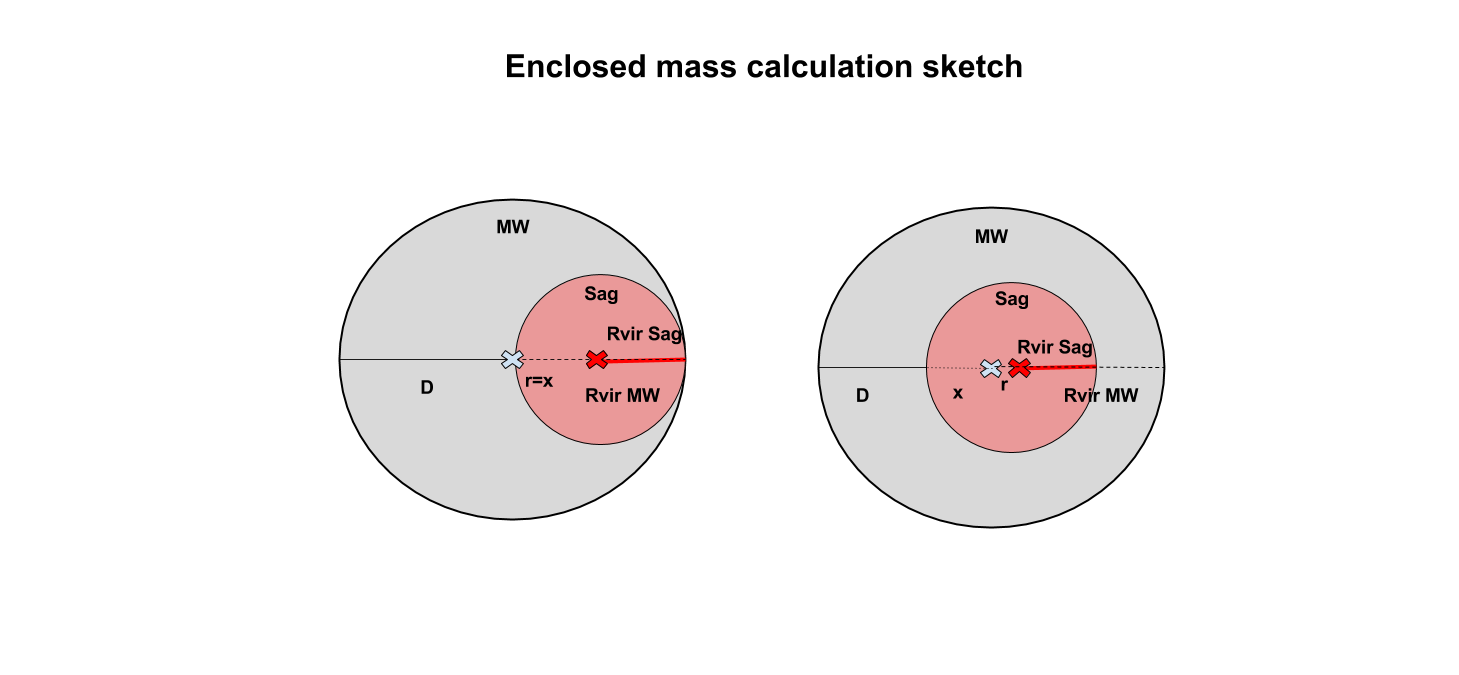

In [3]:
Img = Image('temp_figures/enclosed_mass.png')
display(Img)

Models description:
    
Model | $\alpha_1$ | $\alpha_2$
--- | --- | --- 
Sag_1 | 0.457 | 0.0
Sag_2 | 0.457 | 1.0
Sag_3 | 0.457 | 0.5
Sag_4 | 0.2   | 0.2

In [20]:
MW = loadtxt('../data/sag/MW_orb.dat')
Sag = loadtxt('../data/sag/Sgr_orb.dat')

# form N-body

t1 = MW[:,-1] - 1.7

xMW = MW[:,0]
yMW = MW[:,1]
zMW = MW[:,2]

xSag = Sag[:,0]
ySag = Sag[:,1]
zSag = Sag[:,2]

vxMW = MW[:,3]
vyMW = MW[:,4]
vzMW = MW[:,5]

vxSag = Sag[:,3]
vySag = Sag[:,4]
vzSag = Sag[:,5]

Rnbody = np.sqrt((xMW - xSag)**2 + (yMW - ySag)**2 + (zMW - zSag)**2)
vnbody = np.sqrt((vxMW - vxSag)**2 + (vyMW - vySag)**2 + (vzMW - vzSag)**2)

In [46]:
#int_host = loadtxt('../../orbits/data/sag/sag_facundo_orbit_df_a02_host.txt')
#int_sat = loadtxt('../../orbits/data/sag/sag_facundo_orbit_df_a02_sat.txt')


int_host = loadtxt('../../orbits/data/sag/sag_4_host.txt')
int_sat = loadtxt('../../orbits/data/sag/sag_4_sat.txt')

In [47]:
t_int = int_host[:,0]
Xmw = int_host[:,1]
Ymw = int_host[:,2]
Zmw = int_host[:,3]
vXmw = int_host[:,4]
vYmw = int_host[:,5]
vZmw = int_host[:,6]

Xsag = int_sat[:,1]
Ysag = int_sat[:,2]
Zsag = int_sat[:,3]
vXsag = int_sat[:,4]
vYsag = int_sat[:,5]
vZsag = int_sat[:,6]

Rint = np.sqrt((Xmw - Xsag)**2 + (Ymw - Ysag)**2 + (Zmw - Zsag)**2)
vint = np.sqrt((vXmw - vXsag)**2 + (vYmw - vYsag)**2 + (vZmw - vZsag)**2)

In [48]:
def interp(x_m, y_m, t_a, t_nb):

    f = interp1d(x_m, y_m, kind="linear")

    x_m_new = x_d
    y_m_new = f(x_d)
    return x_m_new, y_m_new

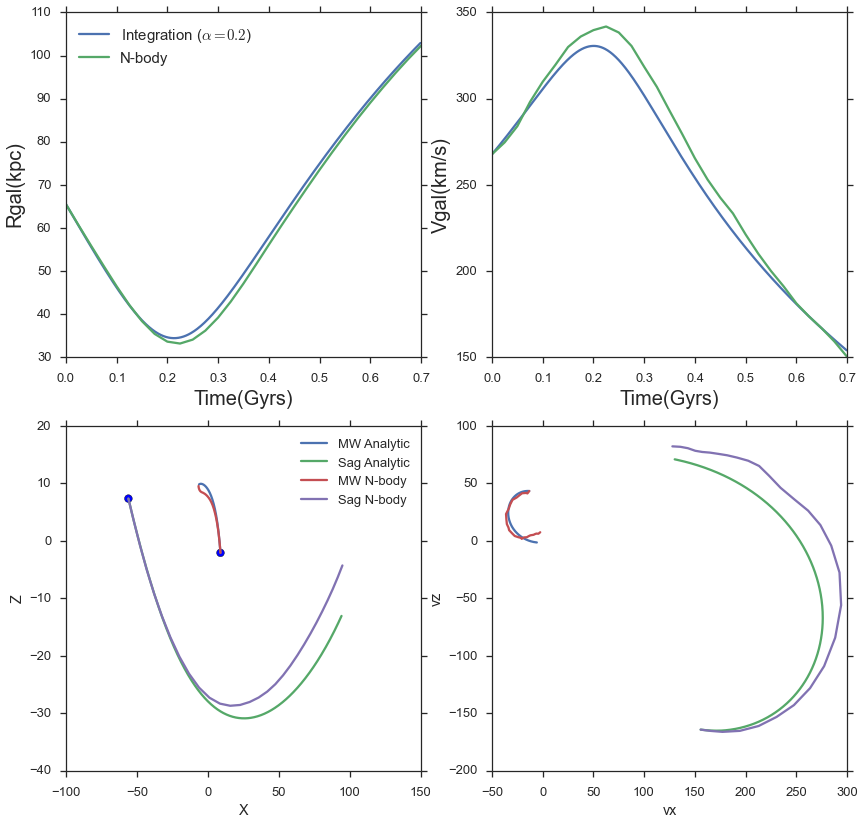

In [49]:
figure(figsize=(14, 21))
subplot(3, 2, 1)
plot(t_int, Rint, label = r'Integration ($\alpha = 0.2$)')
plot(t1, Rnbody, label = 'N-body')
legend(loc='best', fontsize=15)
xlabel('Time(Gyrs)', fontsize=20)
ylabel('Rgal(kpc)', fontsize=20)

subplot(3, 2, 2)
plot(t_int, vint, label = r'Integration ($\alpha = 0.2$)')
plot(t1, vnbody, label = 'N-body')
xlabel('Time(Gyrs)', fontsize=20)
ylabel('Vgal(km/s)', fontsize=20)

subplot(3, 2, 3)
plot(Xmw, Zmw, label='MW Analytic')
xlabel('X')
ylabel('Z')
scatter(Xmw[0], Zmw[0])
plot(Xsag, Zsag, label = 'Sag Analytic')
plot(xMW, zMW, label = 'MW N-body')
plot(xSag, zSag, label = 'Sag N-body')
scatter(Xsag[0], Zsag[0], s=60)
scatter(xMW[0], zMW[0], s=60)
legend(loc='best')

subplot(3, 2, 4)
plot(vXmw, vZmw, label = r'Integration ($\alpha = 0.2$)')
plot(vXsag, vZsag, label = 'N-body')
plot(vxMW, vzMW)
plot(vxSag, vzSag)
xlabel('vx')
ylabel('vz')

"""
subplot(3, 2, 5)
plot(Ymw, Zmw)
scatter(Ymw[0], Zmw[0])
plot(Ysag, Zsag)
plot(yMW, zMW)
plot(ySag, zSag)
scatter(Ysag[0], Zsag[0], s=60)
scatter(yMW[0], zMW[0], s=60)

subplot(3, 2, 6)
plot(vYmw, vZmw, label = r'Integration ($\alpha = 0.2$)')
plot(vYsag, vZsag, label = 'N-body')
plot(vyMW, vzMW)
plot(vySag, vzSag)
"""
savefig('comparison.png')

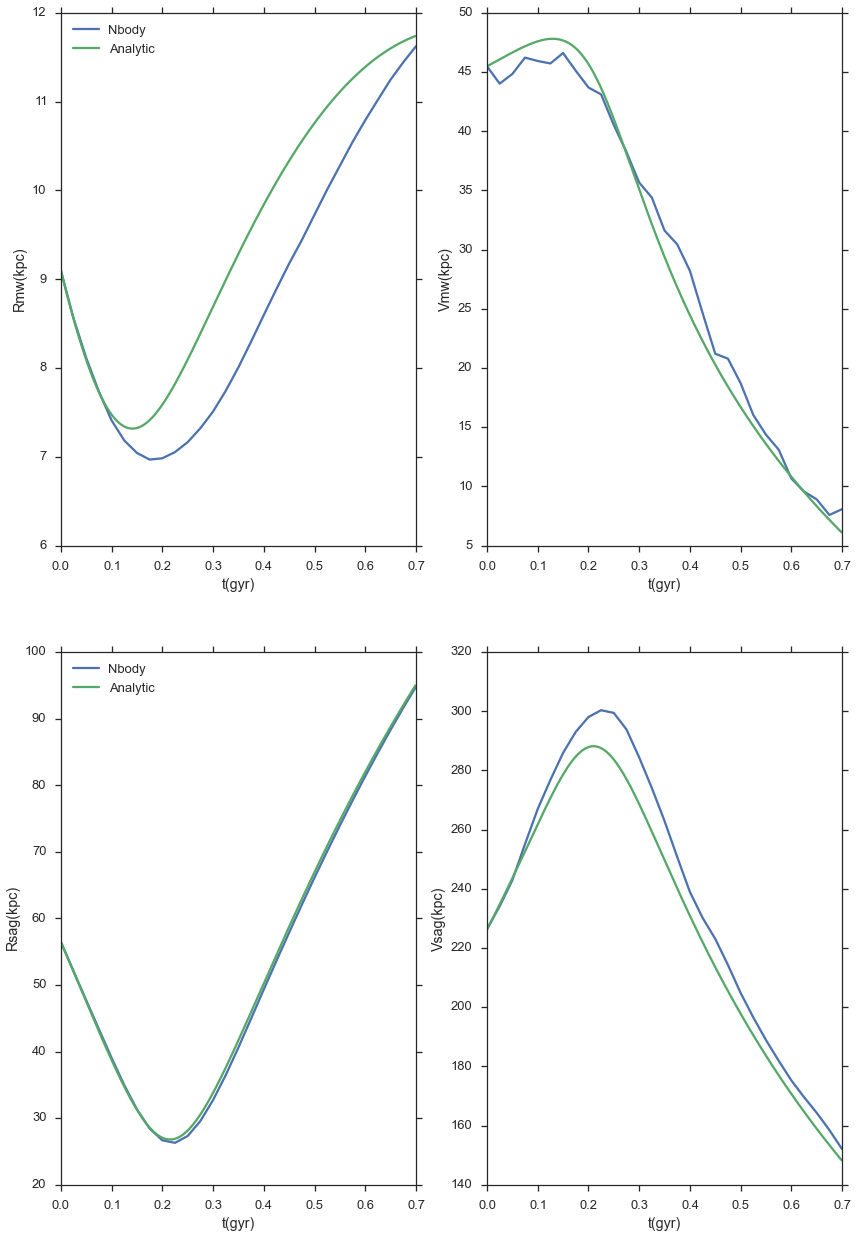

In [59]:
figure(figsize=(14, 21))

subplot(2, 2, 1)
rmw = np.sqrt(xMW**2 + yMW**2 + zMW**2)
Rmw = np.sqrt(Xmw**2 + Ymw**2 + Zmw**2)

plot(t1, rmw, label='Nbody')
plot(t_int, Rmw, label='Analytic')
xlabel('t(gyr)')
ylabel('Rmw(kpc)')
legend(loc='best')

subplot(2, 2, 2)

vmw = np.sqrt(vxMW**2 + vyMW**2 + vzMW**2)
Vmw = np.sqrt(vXmw**2 + vYmw**2 + vZmw**2)
plot(t1, vmw)
plot(t_int, Vmw)
xlabel('t(gyr)')
ylabel('Vmw(kpc)')


subplot(2, 2, 3)
rsag = np.sqrt(xSag**2 + ySag**2 + zSag**2)
Rsag = np.sqrt(Xsag**2 + Ysag**2 + Zsag**2)

plot(t1, rsag, label='Nbody')
plot(t_int, Rsag, label='Analytic')
xlabel('t(gyr)')
ylabel('Rsag(kpc)')
legend(loc='best')

subplot(2, 2, 4)

vsag = np.sqrt(vxSag**2 + vySag**2 + vzSag**2)
Vsag = np.sqrt(vXsag**2 + vYsag**2 + vZsag**2)
plot(t1, vsag)
plot(t_int, Vsag)
xlabel('t(gyr)')
ylabel('Vsag(kpc)')
#xlim(0.65, 0.7)
#ylim(90, 100)
savefig('mw_sag_orbits.png', bbox_inches='tight')

In [51]:
int_host_full = loadtxt('../../orbits/data/sag_heavy_full_host.txt')
int_sat_full = loadtxt('../../orbits/data/sag_heavy_full_sat.txt')

int_host_df = loadtxt('../../orbits/data/sag_heavy_free_df_a0457_full_host.txt') # original sent to facundo
int_sat_df = loadtxt('../../orbits/data/sag_heavy_free_df_a0457_full_sat.txt') # original sent to facundo

In [52]:
t_f = int_host_full[:,0]
Xmw_f = int_host_full[:,1]
Ymw_f = int_host_full[:,2]
Zmw_f = int_host_full[:,3]
vXmw_f = int_host_full[:,4]
vYmw_f = int_host_full[:,5]
vZmw_f = int_host_full[:,6]

Xsag_f = int_sat_full[:,1]
Ysag_f = int_sat_full[:,2]
Zsag_f = int_sat_full[:,3]
vXsag_f = int_sat_full[:,4]
vYsag_f = int_sat_full[:,5]
vZsag_f = int_sat_full[:,6]

Rint_f = np.sqrt((Xmw_f - Xsag_f)**2 + (Ymw_f - Ysag_f)**2 + (Zmw_f - Zsag_f)**2)
vint_f = np.sqrt((vXmw_f - vXsag_f)**2 + (vYmw_f - vYsag_f)**2 + (vZmw_f - vZsag_f)**2)

t_df = int_sat_df[:,0]
Xmw_df = int_host_df[:,1]
Ymw_df = int_host_df[:,2]
Zmw_df = int_host_df[:,3]
vXmw_df = int_host_df[:,4]
vYmw_df = int_host_df[:,5]
vZmw_df = int_host_df[:,6]

Xsag_df = int_sat_df[:,1]
Ysag_df = int_sat_df[:,2]
Zsag_df = int_sat_df[:,3]
vXsag_df = int_sat_df[:,4]
vYsag_df = int_sat_df[:,5]
vZsag_df = int_sat_df[:,6]

Rint_df = np.sqrt((Xmw_df - Xsag_df)**2 + (Ymw_df - Ysag_df)**2 + (Zmw_df - Zsag_df)**2)
vint_df = np.sqrt((vXmw_df - vXsag_df)**2 + (vYmw_df - vYsag_df)**2 + (vZmw_df - vZsag_df)**2)

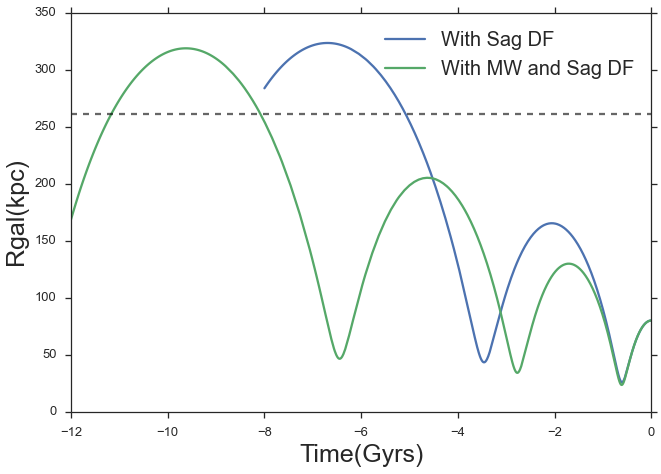

In [60]:
plot(t_df, Rint_df, label='With Sag DF')
plot(t_f, Rint_f, label='With MW and Sag DF')
axhline(261, ls='--', c='k', alpha=0.6)
legend(fontsize=20)
xlabel('Time(Gyrs)', fontsize=25)
ylabel('Rgal(kpc)', fontsize=25)
savefig('orbits.png', bbox_inches='tight')

In [13]:
def IC(x, y, z, vx, vy, vz, R):
    R_free = R
    MIN = abs(R_free-261)
    index = where(MIN == min((MIN)) )
    x = x[index[0]]
    y = y[index[0]]
    z = z[index[0]]
    vx = vx[index[0]]
    vy = vy[index[0]]
    vz = vz[index[0]]
    print x, y, z, vx, vy, vz

In [14]:
print "ICs with MW df: "
IC(Xsag_f, Ysag_f, Zsag_f, vXsag_f, vYsag_f, vZsag_f, Rint_f)
print "ICs without MW df"
IC(Xsag_df, Ysag_df, Zsag_df, vXsag_df, vYsag_df, vZsag_df, Rint_df)

ICs with MW df: 
[ 153.242992] [ 0.] [-331.284059] [-10.189531] [ 0.] [ 102.697046]
ICs without MW df
[-205.130214] [ 0.] [-236.049742] [ 90.932968] [ 0.] [ 23.943523]


In [15]:
IC(Xmw_f, Ymw_f, Zmw_f, vXmw_f, vYmw_f, vZmw_f, Rint_f)


[-20.611162] [ 0.] [-136.589936] [-3.802752] [ 0.] [ 4.236323]


In [16]:
IC(Xmw_df, Ymw_df, Zmw_df, vXmw_df, vYmw_df, vZmw_df, Rint_df)


[ 5.882586] [ 0.] [-82.377313] [-9.240639] [ 0.] [ 24.612323]
